In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/EDEM IA/IA_predictiva/IA_project/Data/train.csv')
test=pd.read_csv('/content/drive/MyDrive/EDEM IA/IA_predictiva/IA_project/Data/test.csv')

In [ ]:
import numpy as np

# Convertir todo a string temporalmente para detectar valores raros
train = train.astype(str).apply(lambda col: col.str.strip())

# Reemplazar ? y -9.0 (en cualquier formato) por NaN
train = train.replace(
    to_replace=[r'^\?$', r'^-9\.0$'],
    value=np.nan,
    regex=True
)


In [ ]:
print(train.head(10))

    age  sex   cp trestbps   chol  fbs restecg thalach exang oldpeak slope  \
0  51.0  1.0  1.0    125.0  213.0  0.0     2.0   125.0   1.0     1.4   1.0   
1  54.0  1.0  3.0    120.0  237.0  0.0     0.0   150.0   1.0     1.5   NaN   
2  63.0  1.0  4.0      140      0  NaN     2.0     149     0       2     1   
3  52.0  0.0  2.0    140.0    NaN  0.0     0.0   140.0   0.0     0.0   NaN   
4  55.0  1.0  4.0    140.0  217.0  0.0     0.0   111.0   1.0     5.6   3.0   
5  44.0  1.0  4.0    120.0  169.0  0.0     0.0   144.0   1.0     2.8   3.0   
6  35.0  1.0  2.0    122.0  192.0  0.0     0.0   174.0   0.0     0.0   1.0   
7  62.0  1.0  4.0      135    297    0     0.0     130     1       1     2   
8  68.0  1.0  4.0      135      0    0     1.0     120     1       0     1   
9  50.0  1.0  4.0    140.0  231.0  0.0     1.0   140.0   1.0     5.0   2.0   

    ca thal label  
0  1.0  3.0     0  
1  NaN  7.0     2  
2  NaN  NaN     2  
3  NaN  NaN     0  
4  0.0  7.0     3  
5  0.0  6.0     2  
6

In [ ]:
# Convertimos a float por si acaso
train["chol"] = pd.to_numeric(train["chol"], errors='coerce')
train["trestbps"] = pd.to_numeric(train["trestbps"], errors='coerce')

# Contar 0 o -9.0
filas_chol = ((train["chol"] == 0) | (train["chol"] == -9)).sum()
filas_trestbps = ((train["trestbps"] == 0) | (train["trestbps"] == -9)).sum()

print(f"Filas con 0 o -9 en 'chol': {filas_chol}")
print(f"Filas con 0 o -9 en 'trestbps': {filas_trestbps}")

Filas con 0 o -9 en 'chol': 135
Filas con 0 o -9 en 'trestbps': 1


In [ ]:
cols_categoricas = ['sex', 'cp', 'restecg']

for col in cols_categoricas:
    # Convertir a número, valores inválidos pasan a NaN
    train[col] = pd.to_numeric(train[col], errors='coerce')

    # Convertir a Int64 para mantener NaN y enteros
    train[col] = train[col].astype('Int64')

In [ ]:
cols_binarias = ['fbs', 'slope', 'exang']

for col in cols_binarias:
    # Convertir a float, manejar errores convirtiendo lo que no se pueda a NaN
    train[col] = pd.to_numeric(train[col], errors='coerce')

    # Convertir a Int64 para mantener los NaN
    train[col] = train[col].astype('Int64')


In [ ]:
for col in train.columns:
    na_count = train[col].isna().sum()
    na_pct = train[col].isna().mean() * 100
    print(f"{col}: {na_count} {na_pct:.2f}%")


age: 0 0.00%
sex: 0 0.00%
cp: 0 0.00%
trestbps: 47 6.42%
chol: 21 2.87%
fbs: 66 9.02%
restecg: 0 0.00%
thalach: 44 6.01%
exang: 44 6.01%
oldpeak: 49 6.69%
slope: 247 33.74%
ca: 479 65.44%
thal: 379 51.78%
label: 0 0.00%


In [ ]:
import numpy as np
import pandas as pd

# Convertir todo a string y quitar espacios
train = train.astype(str).apply(lambda col: col.str.strip())

# Reemplazar números negativos por NaN
train = train.replace(r'^-\d+(\.\d+)?$', np.nan, regex=True)

# Forzar conversión a numérico donde se pueda
train = train.apply(pd.to_numeric, errors='coerce')



In [ ]:
train.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51.0,1,1,125.0,213.0,0.0,2,125.0,1.0,1.4,1.0,1.0,3.0,0
1,54.0,1,3,120.0,237.0,0.0,0,150.0,1.0,1.5,NaN,NaN,7.0,2
2,63.0,1,4,140.0,0.0,NaN,2,149.0,0.0,2.0,1.0,NaN,NaN,2
3,52.0,0,2,140.0,NaN,0.0,0,140.0,0.0,0.0,NaN,NaN,NaN,0
4,55.0,1,4,140.0,217.0,0.0,0,111.0,1.0,5.6,3.0,0.0,7.0,3
5,44.0,1,4,120.0,169.0,0.0,0,144.0,1.0,2.8,3.0,0.0,6.0,2
6,35.0,1,2,122.0,192.0,0.0,0,174.0,0.0,0.0,1.0,0.0,3.0,0
7,62.0,1,4,135.0,297.0,0.0,0,130.0,1.0,1.0,2.0,NaN,NaN,2
8,68.0,1,4,135.0,0.0,0.0,1,120.0,1.0,0.0,1.0,NaN,7.0,3
9,50.0,1,4,140.0,231.0,0.0,1,140.0,1.0,5.0,2.0,NaN,NaN,4


In [ ]:
# Guardar el dataset limpio
train.to_csv('/content/drive/MyDrive/EDEM IA/IA_predictiva/IA_project/Data/Train/train_comprobar.csv', index=False)


In [ ]:
# Convertimos a string temporalmente
train['oldpeak'] = train['oldpeak'].astype(str).str.strip()

# Agregamos un 0 delante si empieza con punto
train['oldpeak'] = train['oldpeak'].apply(lambda x: '0'+x if x.startswith('.') else x)

# Convertimos de nuevo a número (float)
train['oldpeak'] = pd.to_numeric(train['oldpeak'], errors='coerce')


In [ ]:
print(train.head(20))

     age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   51.0    1   1     125.0  213.0  0.0        2    125.0    1.0      1.4   
1   54.0    1   3     120.0  237.0  0.0        0    150.0    1.0      1.5   
2   63.0    1   4     140.0    0.0  NaN        2    149.0    0.0      2.0   
3   52.0    0   2     140.0    NaN  0.0        0    140.0    0.0      0.0   
4   55.0    1   4     140.0  217.0  0.0        0    111.0    1.0      5.6   
5   44.0    1   4     120.0  169.0  0.0        0    144.0    1.0      2.8   
6   35.0    1   2     122.0  192.0  0.0        0    174.0    0.0      0.0   
7   62.0    1   4     135.0  297.0  0.0        0    130.0    1.0      1.0   
8   68.0    1   4     135.0    0.0  0.0        1    120.0    1.0      0.0   
9   50.0    1   4     140.0  231.0  0.0        1    140.0    1.0      5.0   
10  38.0    1   3     100.0    0.0  NaN        0    179.0    0.0      NaN   
11  64.0    1   4     120.0  246.0  0.0        2     96.0    1.0      2.2   

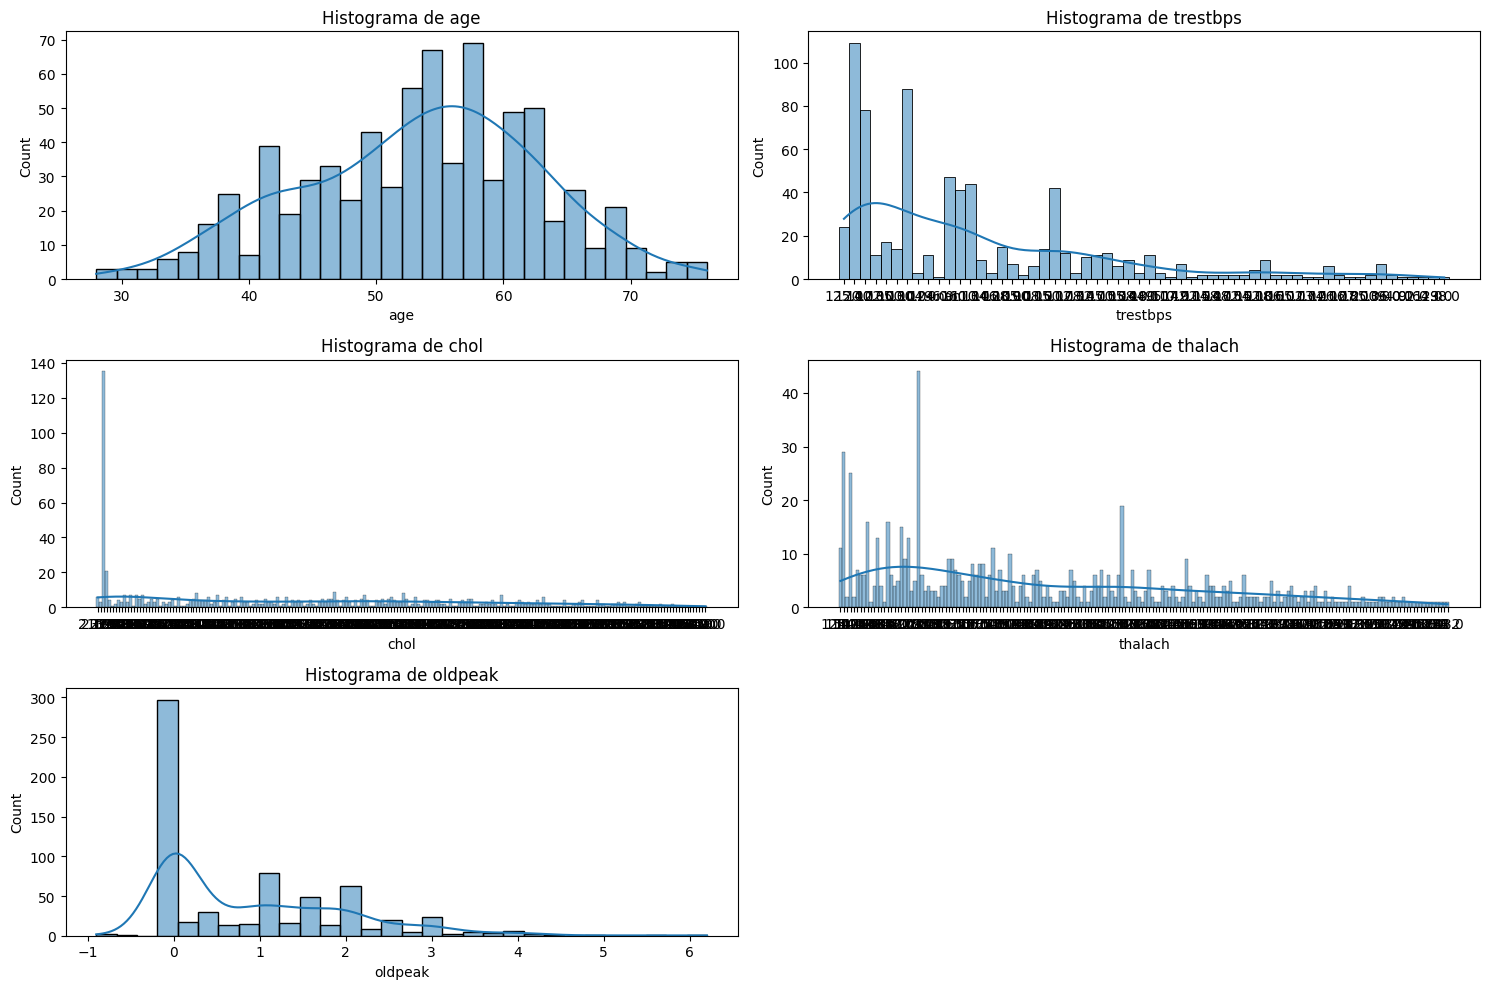

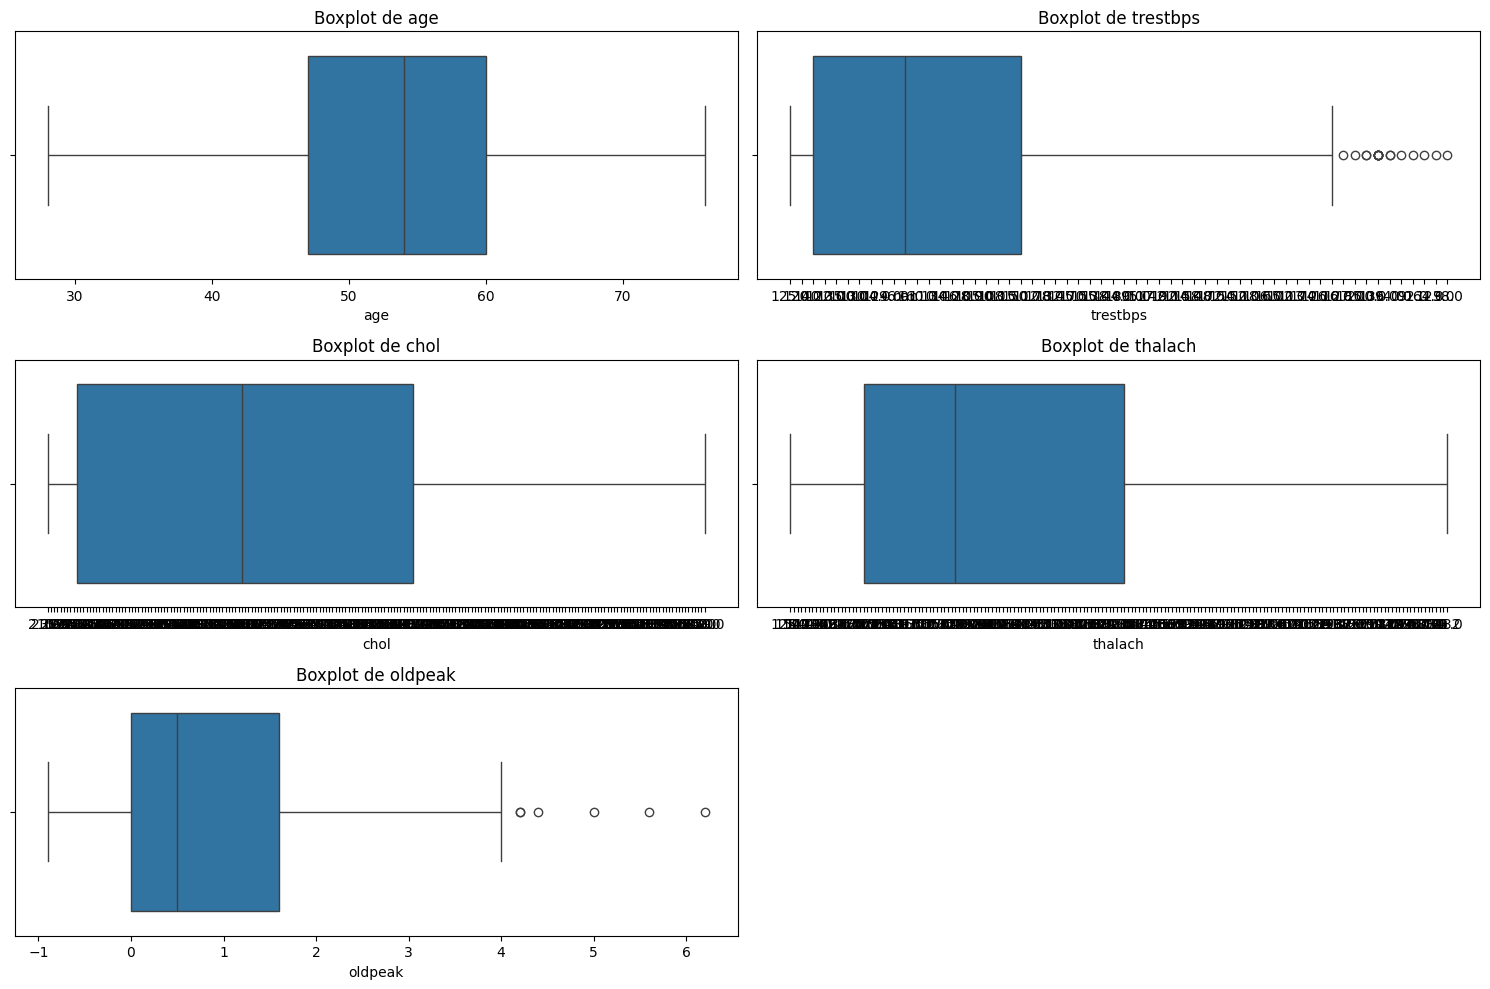

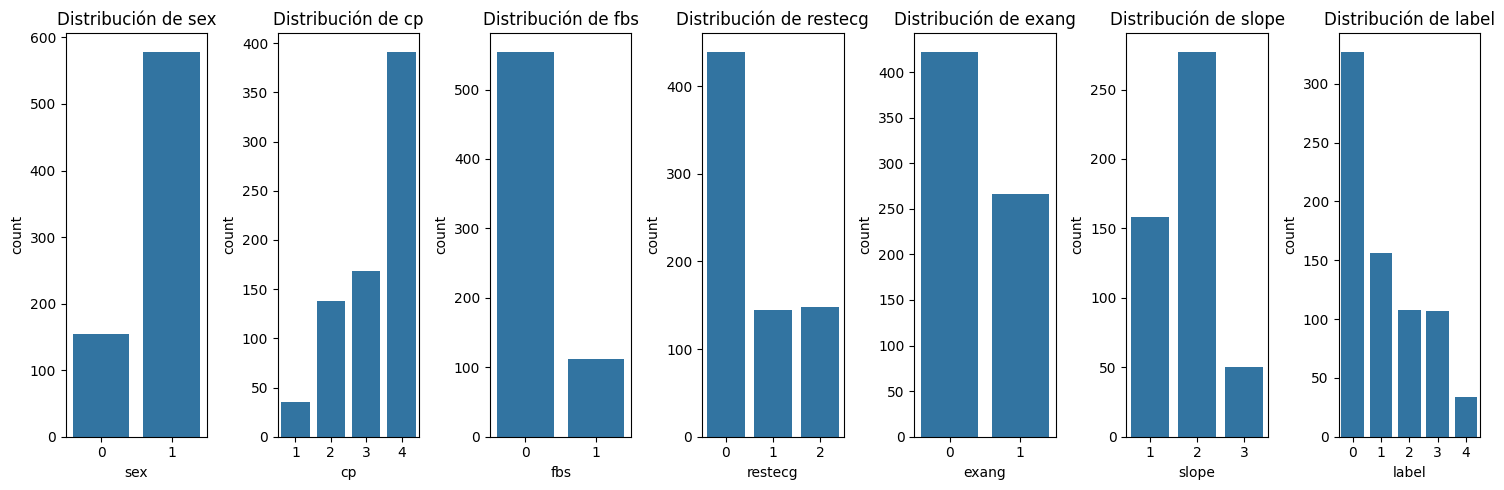

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# 1️⃣ Identificar columnas
# -------------------------
# Numéricas
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Categóricas
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'label']

# -------------------------
# 2️⃣ Distribución variables numéricas
# -------------------------
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//2 + 1, 2, i)
    sns.histplot(train[col], kde=True, bins=30)
    plt.title(f'Histograma de {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//2 + 1, 2, i)
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

# -------------------------
# 3️⃣ Distribución variables categóricas
# -------------------------
plt.figure(figsize=(15, 5))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, len(cat_cols), i)
    sns.countplot(x=train[col])
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()


In [ ]:
# Reemplazar ambos por np.nan (opcional para unificar)
train = train.replace({pd.NA: np.nan})


In [ ]:
import pandas as pd

# Total de filas
total_filas = len(train)

# Calcular cantidad y porcentaje de NA por columna
na_por_columna = train.isna().sum()
porcentaje_na = (na_por_columna / total_filas * 100).round(2)

# Combinar en un DataFrame para mejor visualización
na_summary = pd.DataFrame({
    'Cantidad_NA': na_por_columna,
    'Porcentaje_NA': porcentaje_na
}).sort_values(by='Cantidad_NA', ascending=False)

print(na_summary)


          Cantidad_NA  Porcentaje_NA
ca                479          65.44
thal              379          51.78
slope             247          33.74
fbs                66           9.02
oldpeak            56           7.65
trestbps           47           6.42
thalach            44           6.01
exang              44           6.01
chol               21           2.87
age                 0           0.00
cp                  0           0.00
sex                 0           0.00
restecg             0           0.00
label               0           0.00


In [ ]:
print(train.head(10))

    age  sex  cp trestbps   chol   fbs  restecg thalach  exang  oldpeak  \
0  51.0    1   1    125.0  213.0     0        2   125.0      1      1.4   
1  54.0    1   3    120.0  237.0     0        0   150.0      1      1.5   
2  63.0    1   4    140.0    0.0  <NA>        2     149      0      2.0   
3  52.0    0   2    140.0    nan     0        0   140.0      0      0.0   
4  55.0    1   4    140.0  217.0     0        0   111.0      1      5.6   
5  44.0    1   4    120.0  169.0     0        0   144.0      1      2.8   
6  35.0    1   2    122.0  192.0     0        0   174.0      0      0.0   
7  62.0    1   4    135.0  297.0     0        0     130      1      1.0   
8  68.0    1   4    135.0    0.0     0        1     120      1      0.0   
9  50.0    1   4    140.0  231.0     0        1   140.0      1      5.0   

   slope   ca thal  label  
0      1  1.0  3.0      0  
1   <NA>  nan  7.0      2  
2      1  nan  nan      2  
3   <NA>  nan  nan      0  
4      3  0.0  7.0      3  
5     

In [ ]:
train = train.drop(columns=["ca", "thal"])


Ahora vamos a hacer clusters para:

- Agrupar pacientes similares según sus características clínicas.

- Analizar patrones clínicos: detectar subgrupos de riesgo o perfiles típicos (p. ej., pacientes con ejercicio limitado, colesterol alto, etc.).

- Mejorar los modelos predictivos: el cluster puede ser una nueva feature para el ensemble o para modelos individuales.

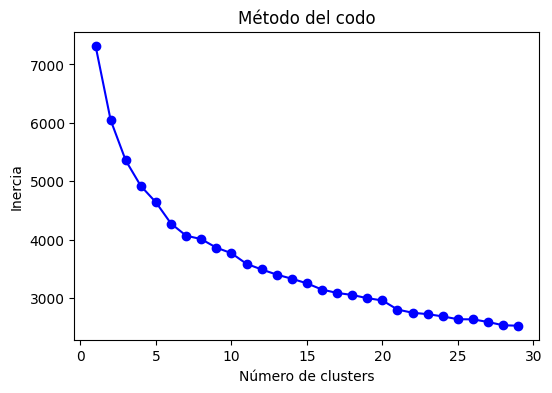

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selección de variables para clustering
cluster_features = ['age','trestbps','chol','thalach','oldpeak','exang','cp','sex','restecg','fbs']
X_temp = train[cluster_features].copy()

# Imputación temporal de NA
num_cols = ['age','trestbps','chol','thalach','oldpeak']
X_temp[num_cols] = X_temp[num_cols].fillna(X_temp[num_cols].median())
cat_cols = ['exang','cp','sex','restecg','fbs']
for col in cat_cols:
    X_temp[col] = X_temp[col].fillna(X_temp[col].mode()[0])

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_temp)

# Método del codo
inertia = []
K = range(1, 30)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'o-', color='blue')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()


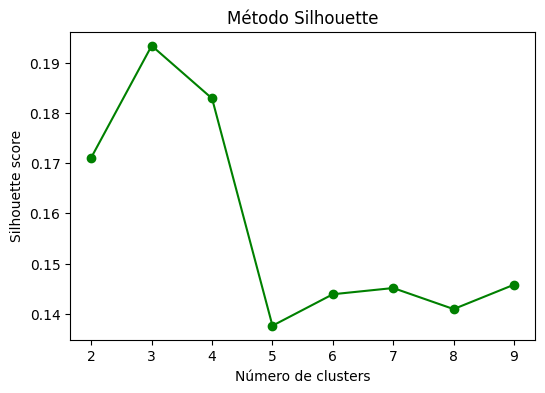

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Selección de variables para clustering
# -----------------------------
cluster_features = ['age','trestbps','chol','thalach','oldpeak','exang','cp','sex','restecg','fbs']
X = train[cluster_features].copy()

# -----------------------------
# 2️⃣ Imputación temporal de NA
# -----------------------------
num_cols = ['age','trestbps','chol','thalach','oldpeak']
cat_cols = ['exang','cp','sex','restecg','fbs']

# Numéricas → mediana
X[num_cols] = X[num_cols].fillna(X[num_cols].median())

# Categóricas/binarias → moda
for col in cat_cols:
    X[col] = X[col].fillna(X[col].mode()[0])

# -----------------------------
# 3️⃣ Normalización
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 4️⃣ Silhouette scores para 2–9 clusters
# -----------------------------
sil_scores = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

# -----------------------------
# 5️⃣ Visualización Silhouette
# -----------------------------
plt.figure(figsize=(6,4))
plt.plot(K_range, sil_scores, 'o-', color='green')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette score')
plt.title('Método Silhouette')
plt.show()



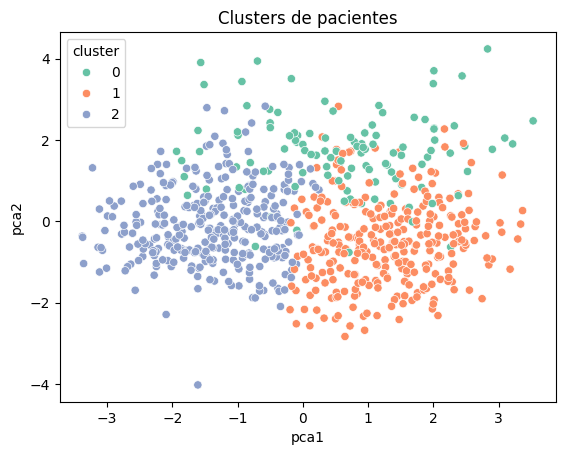

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# -----------------------------
# 1️⃣ Selección de variables para clustering
# -----------------------------
cluster_features = ['age','trestbps','chol','thalach','oldpeak','exang','cp','sex','restecg','fbs']
X_temp = train[cluster_features].copy()

# -----------------------------
# 2️⃣ Imputación temporal para clustering
# -----------------------------
# Variables numéricas → medianas
num_cols = ['age','trestbps','chol','thalach','oldpeak']
X_temp[num_cols] = X_temp[num_cols].fillna(X_temp[num_cols].median())

# Variables binarias/categóricas → moda
cat_cols = ['exang','cp','sex','restecg','fbs']
for col in cat_cols:
    X_temp[col] = X_temp[col].fillna(X_temp[col].mode()[0])

# -----------------------------
# 3️⃣ Normalización de variables
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_temp)

# -----------------------------
# 4️⃣ Generar clusters
# -----------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
train['cluster'] = kmeans.fit_predict(X_scaled)

# -----------------------------
# 5️⃣ (Opcional) Imputación de variables con NA por cluster
# -----------------------------
na_cols = ['slope','oldpeak','trestbps','thalach','exang','fbs']  # ajusta según tu dataset
for col in na_cols:
    if col in train.columns:
        train[col] = train.groupby('cluster')[col].transform(lambda x: x.fillna(x.median()))

# -----------------------------
# 6️⃣ Visualización de clusters (opcional)
# -----------------------------
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
train['pca1'] = X_pca[:,0]
train['pca2'] = X_pca[:,1]

sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=train, palette='Set2')
plt.title("Clusters de pacientes")
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


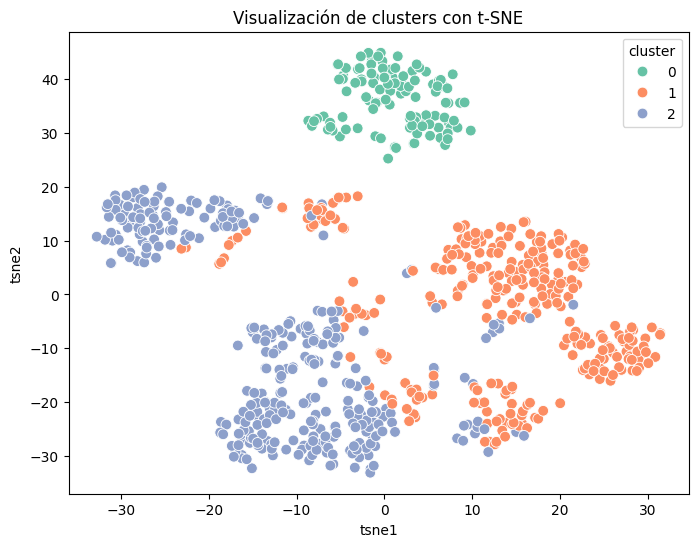

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Selección de variables
cluster_features = ['age','trestbps','chol','thalach','oldpeak','exang','cp','sex','restecg','fbs']

# -----------------------------
# 1️⃣ Imputación de NA
# -----------------------------
num_cols = ['age','trestbps','chol','thalach','oldpeak']
cat_cols = ['exang','cp','sex','restecg','fbs']

# Numéricas → mediana
train[num_cols] = train[num_cols].fillna(train[num_cols].median())

# Categóricas/binarias → moda
for col in cat_cols:
    train[col] = train[col].fillna(train[col].mode()[0])

# -----------------------------
# 2️⃣ Normalización
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train[cluster_features])

# -----------------------------
# 3️⃣ t-SNE
# -----------------------------
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# -----------------------------
# 4️⃣ Añadir resultados al dataframe
# -----------------------------
train['tsne1'] = X_tsne[:,0]
train['tsne2'] = X_tsne[:,1]

# -----------------------------
# 5️⃣ Visualización
# -----------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x='tsne1', y='tsne2', hue='cluster', data=train, palette='Set2', s=60)
plt.title("Visualización de clusters con t-SNE")
plt.show()


Ahora quiero ver la importancia de cada variable a la hora de hacer el cluster para definir el perfil.

fbs         0.308892
exang       0.176011
thalach     0.168942
oldpeak     0.104164
cp          0.078443
age         0.060267
chol        0.051667
trestbps    0.030604
restecg     0.011287
sex         0.009723
dtype: float64


/tmp/ipython-input-1498450111.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette='viridis')


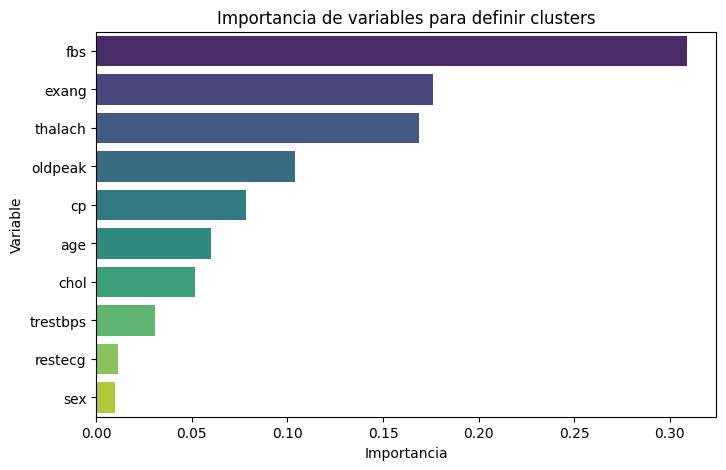

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Variables usadas para clustering
cluster_features = ['age','trestbps','chol','thalach','oldpeak','exang','cp','sex','restecg','fbs']

# X = variables, y = cluster
X = train[cluster_features]
y = train['cluster']

# Random Forest para predecir clusters
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X, y)

# Importancia de cada variable
importances = pd.Series(rf.feature_importances_, index=cluster_features).sort_values(ascending=False)
print(importances)

# Visualización
plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index, palette='viridis')
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.title("Importancia de variables para definir clusters")
plt.show()



Ahora quiero definir el perfil de cada clsuter, para eso voy a calcular la media y la proporción.

In [ ]:
num_cols = ['age','trestbps','chol','thalach','oldpeak']
train.groupby('cluster')[num_cols].median()


,age,trestbps,chol,thalach,oldpeak
cluster,,,,,
0,58.0,138.0,237.0,140.0,1.0
1,57.0,130.0,212.0,121.0,1.5
2,49.0,128.0,230.0,156.0,0.0


In [ ]:
cat_cols = ['sex','cp','restecg','exang','fbs']

for col in cat_cols:
    # Crear tabla de proporciones por cluster
    prop_df = train.groupby('cluster')[col].value_counts(normalize=True).unstack(fill_value=0)

    print(f"Distribución de {col} por cluster:\n")
    display(prop_df)  # Si estás en Jupyter/Colab, display() lo muestra bonito
    print("\n" + "-"*50 + "\n")


Distribución de sex por cluster:



sex,0,1
cluster,,
0,0.160714,0.839286
1,0.109215,0.890785
2,0.318043,0.681957



--------------------------------------------------

Distribución de cp por cluster:



cp,1,2,3,4
cluster,,,,
0,0.062500,0.133929,0.250000,0.553571
1,0.006826,0.020478,0.146758,0.825939
2,0.079511,0.357798,0.296636,0.266055



--------------------------------------------------

Distribución de restecg por cluster:



restecg,0,1,2
cluster,,,
0,0.401786,0.330357,0.267857
1,0.607509,0.218430,0.174061
2,0.660550,0.134557,0.204893



--------------------------------------------------

Distribución de exang por cluster:



exang,0.0,1.0
cluster,,
0,0.651786,0.348214
1,0.269625,0.730375
2,0.948012,0.051988



--------------------------------------------------

Distribución de fbs por cluster:



fbs,0.0,1.0
cluster,,
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0



--------------------------------------------------



Cluster 0

Edad: 58 → pacientes mayores.

Presión: 138 → ligeramente elevada.

Colesterol: 237 → moderadamente alto.

Frecuencia cardíaca máxima: 140 → algo baja.

Oldpeak: 1 → ligera depresión ST inducida.

Sexo: mayoritariamente hombres (84%).

Tipo de dolor de pecho: predomina asintomático (55%), no anginoso (25%).

ECG en reposo: distribución equilibrada.

Angina inducida por ejercicio: 35% sí, 65% no.

Glucemia: todos elevados (>120 mg/dl).

🔹 Perfil general:
Pacientes mayores y mayoritariamente hombres, con riesgo metabólico moderado (colesterol y glucemia altos), ligera afectación por ejercicio, pero muchos sin dolor de pecho típico.

Cluster 1

Edad: 57 → edad media.

Presión: 130 → normal.

Colesterol: 212 → más bajo que cluster 0.

Frecuencia cardíaca máxima: 121 → baja.

Oldpeak: 1.5 → mayor depresión ST inducida.

Sexo: 89% hombres.

Tipo de dolor de pecho: principalmente asintomático (83%).

ECG en reposo: 61% normal.

Angina inducida por ejercicio: 73% sí → mayoría afectada.

Glucemia: todos normales.

🔹 Perfil general:
Pacientes hombres de mediana edad, con riesgo funcional cardiovascular: alta incidencia de angina inducida y depresión ST, aunque factores metabólicos normales.

Cluster 2

Edad: 49 → pacientes más jóvenes.

Presión: 128 → normal.

Colesterol: 230 → moderadamente alto.

Frecuencia cardíaca máxima: 156 → buena respuesta al esfuerzo.

Oldpeak: 0 → sin depresión ST inducida.

Sexo: mezcla de hombres y mujeres (68% hombres).

Tipo de dolor de pecho: heterogéneo, ninguna categoría domina.

ECG en reposo: mayoría normal (66%).

Angina inducida por ejercicio: casi ninguno (95% no).

Glucemia: todos normales.

🔹 Perfil general:
Pacientes más jóvenes, mixtos en sexo, con bajo riesgo cardiovascular, buena capacidad de esfuerzo y sin síntomas importantes inducidos por ejercicio.

In [ ]:
# Cantidad de hombres y mujeres
train['sex'].value_counts()


,count
sex,
1,578
0,154


In [ ]:
print(train.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'label', 'cluster', 'pca1', 'pca2',
       'tsne1', 'tsne2'],
      dtype='object')


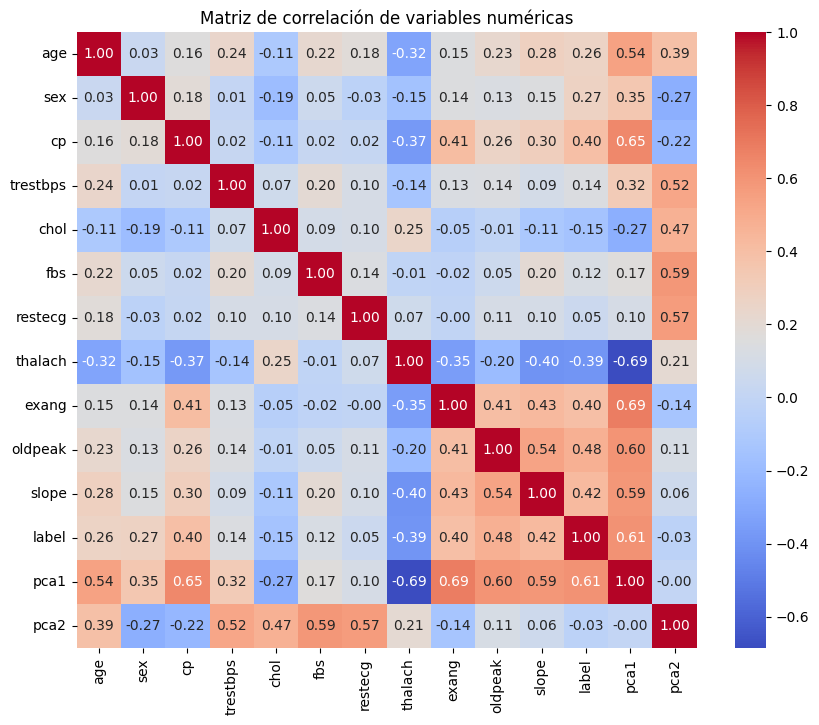

In [ ]:
import pandas as pd

# Seleccionar solo columnas numéricas
num_cols = train.select_dtypes(include=['int64', 'float64']).columns

# Calcular correlación
correlation_matrix = train[num_cols].corr(method='pearson')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de correlación de variables numéricas")
plt.show()



In [ ]:
print(train.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'label', 'cluster', 'tsne1', 'tsne2'],
      dtype='object')


In [ ]:
train = train.drop(columns=['pca1', 'pca2'])


Resumen del risk_score:
count    732.000000
mean       2.655902
std        0.927770
min        1.233240
25%        1.921667
50%        2.499506
75%        3.250431
max        6.661922
Name: risk_score, dtype: float64


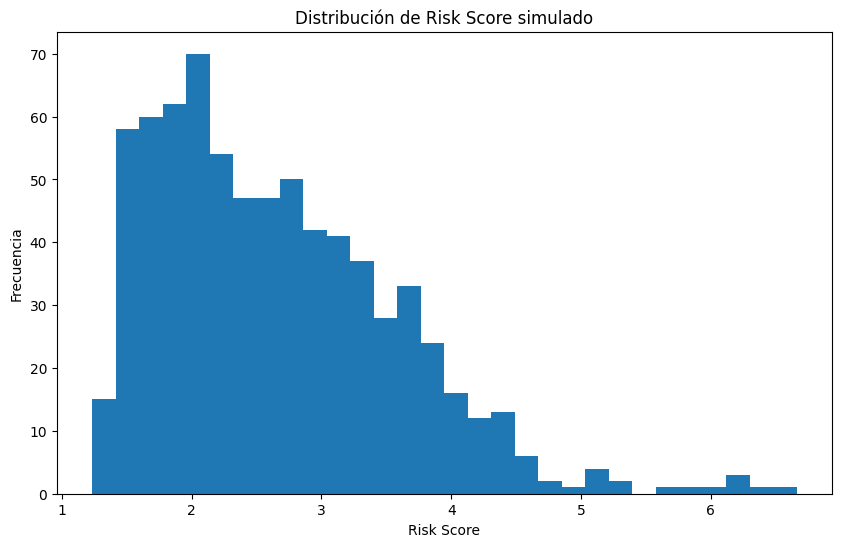

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_patient_risk(df):
    """
    Simula un 'risk_score' continuo tipo Gamma para cada paciente.
    """
    np.random.seed(42)
    df_risk = df.copy()

    base_risk = 1.0

    # ----------------- Factores multiplicativos -----------------
    age_factor = pd.cut(df_risk['age'],
                        bins=[0,49,59,120],
                        labels=[1.0,1.1,1.3])

    sex_factor = df_risk['sex'].map({0:1.0, 1:1.1})

    cp_factor = df_risk['cp'].map({1:1.0, 2:1.1, 3:1.2, 4:1.5})

    fbs_factor = df_risk['fbs'].map({0:1.0, 1:1.2})

    exang_factor = df_risk['exang'].map({0:1.0, 1:1.3})

    oldpeak_factor = np.where(df_risk['oldpeak']>1, 1.2, 1.0)

    cluster_factor = df_risk['cluster'].map({0:0.9, 1:1.1, 2:1.2})

    # ----------------- Riesgo multiplicativo -----------------
    risk = base_risk * age_factor.astype(float) * sex_factor * cp_factor * fbs_factor * exang_factor * oldpeak_factor * cluster_factor

    # ----------------- Componente aleatorio tipo Gamma -----------------
    random_component = np.random.gamma(shape=1.0, scale=risk*0.2)

    df_risk['risk_score'] = risk + random_component

    # ----------------- Estadísticas y visualización -----------------
    print("Resumen del risk_score:")
    print(df_risk['risk_score'].describe())

    plt.figure(figsize=(10,6))
    plt.hist(df_risk['risk_score'], bins=30)
    plt.title("Distribución de Risk Score simulado")
    plt.xlabel("Risk Score")
    plt.ylabel("Frecuencia")
    plt.show()

    return df_risk

# ----------------- Uso -----------------
train_risk = simulate_patient_risk(train)


In [ ]:
print(train.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'label', 'cluster', 'tsne1', 'tsne2',
       'risk_score'],
      dtype='object')


Resumen del risk_score:
count    732.000000
mean       2.655902
std        0.927770
min        1.233240
25%        1.921667
50%        2.499506
75%        3.250431
max        6.661922
Name: risk_score, dtype: float64


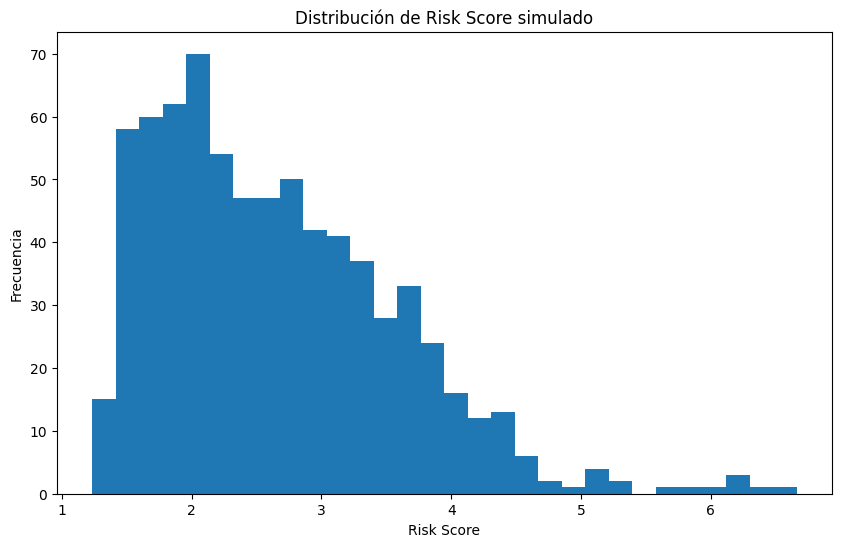

In [ ]:
# Simular el riesgo y devolver un DataFrame con la columna risk_score
train_with_risk = simulate_patient_risk(train)

# Guardar la columna directamente en el DataFrame original
train['risk_score'] = train_with_risk['risk_score']


In [ ]:
# Cantidad de NA por columna
print(train.isna().sum())

# También puedes ver si hay algún NA en todo el DataFrame
print("¿Hay algún NA en el dataset?", train.isna().any().any())


age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
label         0
cluster       0
tsne1         0
tsne2         0
risk_score    0
dtype: int64
¿Hay algún NA en el dataset? False


In [ ]:
train.to_csv('/content/drive/MyDrive/EDEM IA/IA_predictiva/IA_project/Data/Train/train_cluster.csv', index=False)

Ahora voy a aplicar todo esto también para el test.

In [ ]:
import numpy as np

# Convertir todo a string temporalmente para detectar valores raros
test = test.astype(str).apply(lambda col: col.str.strip())

# Reemplazar ? y -9.0 (en cualquier formato) por NaN
test = test.replace(
    to_replace=[r'^\?$', r'^-9\.0$'],
    value=np.nan,
    regex=True
)

In [ ]:
# Convertimos a float por si acaso
test["chol"] = pd.to_numeric(test["chol"], errors='coerce')
test["trestbps"] = pd.to_numeric(test["trestbps"], errors='coerce')

# Contar 0 o -9.0
filas_chol = ((test["chol"] == 0) | (test["chol"] == -9)).sum()
filas_trestbps = ((test["trestbps"] == 0) | (test["trestbps"] == -9)).sum()

print(f"Filas con 0 o -9 en 'chol': {filas_chol}")
print(f"Filas con 0 o -9 en 'trestbps': {filas_trestbps}")

Filas con 0 o -9 en 'chol': 36
Filas con 0 o -9 en 'trestbps': 0


In [ ]:
cols_categoricas = ['sex', 'cp', 'restecg']

for col in cols_categoricas:
    # Convertir a número, valores inválidos pasan a NaN
    test[col] = pd.to_numeric(test[col], errors='coerce')

    # Convertir a Int64 para mantener NaN y enteros
    test[col] = test[col].astype('Int64')

In [ ]:
cols_binarias = ['fbs', 'slope', 'exang']

for col in cols_binarias:
    # Convertir a float, manejar errores convirtiendo lo que no se pueda a NaN
    test[col] = pd.to_numeric(test[col], errors='coerce')

    # Convertir a Int64 para mantener los NaN
    test[col] = test[col].astype('Int64')

In [ ]:
import numpy as np
import pandas as pd

# Convertir todo a string y quitar espacios
test = test.astype(str).apply(lambda col: col.str.strip())

# Reemplazar números negativos por NaN
test = test.replace(r'^-\d+(\.\d+)?$', np.nan, regex=True)

# Forzar conversión a numérico donde se pueda
test = test.apply(pd.to_numeric, errors='coerce')


In [ ]:
# Convertimos a string temporalmente
test['oldpeak'] = test['oldpeak'].astype(str).str.strip()

# Agregamos un 0 delante si empieza con punto
test['oldpeak'] = test['oldpeak'].apply(lambda x: '0'+x if x.startswith('.') else x)

# Convertimos de nuevo a número (float)
test['oldpeak'] = pd.to_numeric(test['oldpeak'], errors='coerce')

In [ ]:
# Reemplazar ambos por np.nan (opcional para unificar)
test = test.replace({pd.NA: np.nan})

In [ ]:
print(test.head(10))

    age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  57.0    1   4     156.0  173.0  0.0      2.0    119.0    1.0      3.0   
1  52.0    1   2     160.0  196.0  0.0      0.0    165.0    0.0      0.0   
2  48.0    1   2     100.0    NaN  0.0      0.0    100.0    0.0      0.0   
3  62.0    1   4     115.0    0.0  NaN      0.0    128.0    1.0      2.5   
4  51.0    1   3     110.0  175.0  0.0      0.0    123.0    0.0      0.6   
5  54.0    0   3     160.0  201.0  0.0      0.0    163.0    0.0      0.0   
6  45.0    1   3     110.0    0.0  NaN      0.0    138.0    0.0      NaN   
7  64.0    1   4     130.0  258.0  1.0      2.0    130.0    0.0      0.0   
8  70.0    1   4     115.0    0.0  0.0      1.0     92.0    1.0      0.0   
9  32.0    1   2     125.0  254.0  0.0      0.0    155.0    0.0      0.0   

   slope   ca  thal  
0    3.0  NaN   NaN  
1    NaN  NaN   NaN  
2    NaN  NaN   NaN  
3    3.0  NaN   NaN  
4    1.0  0.0   3.0  
5    1.0  1.0   3.0  
6    1.0 

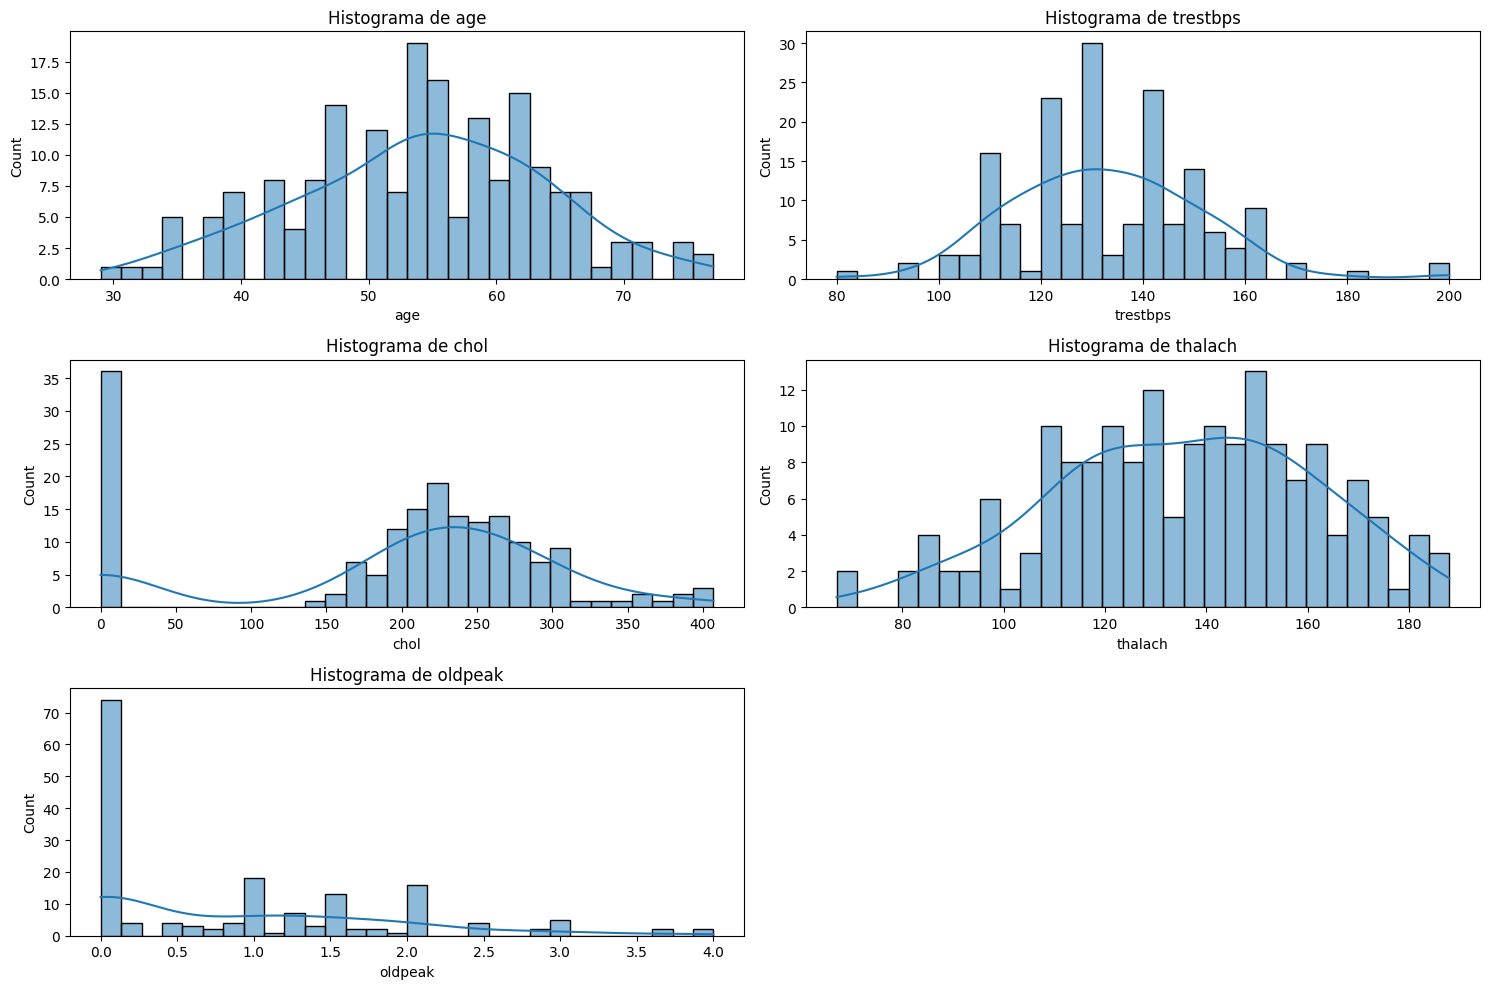

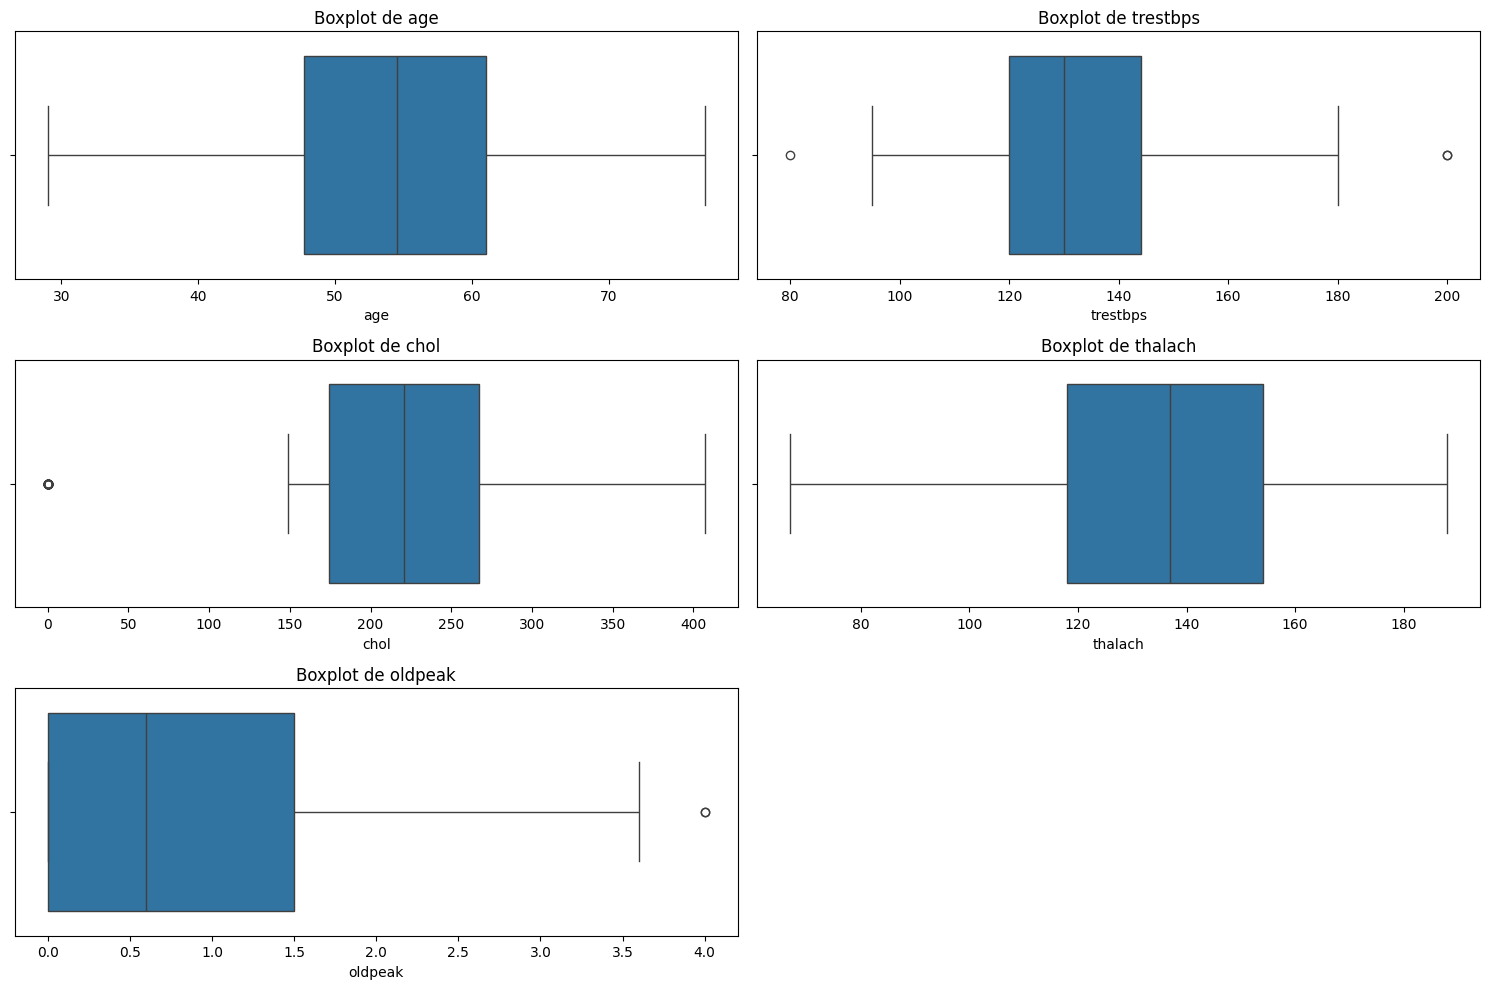

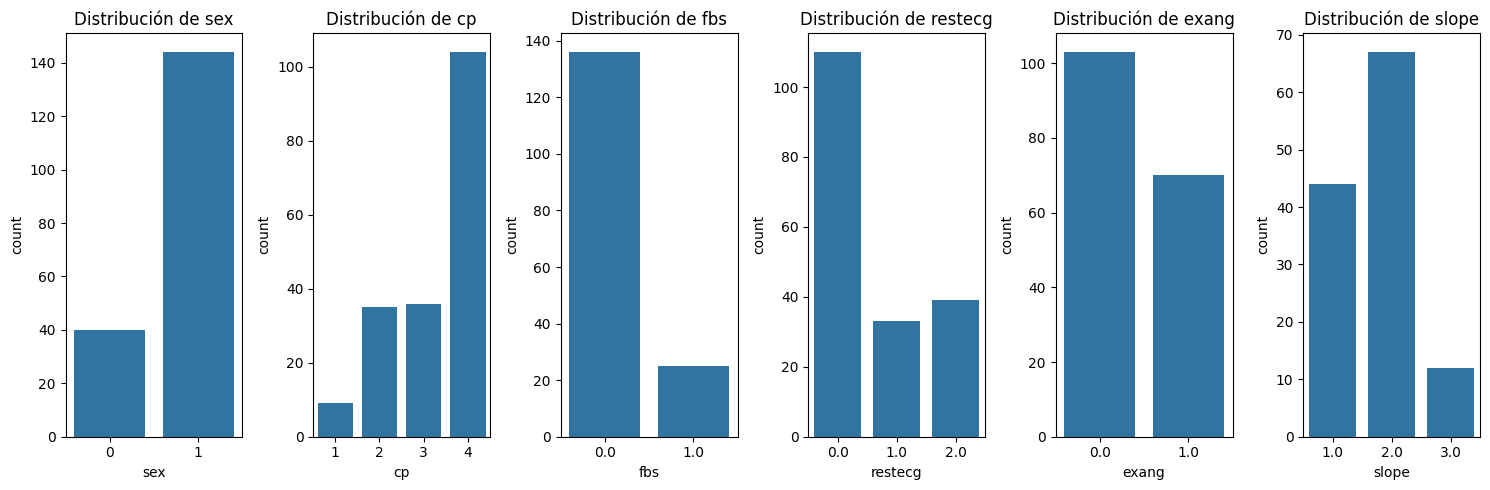

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# 1️⃣ Identificar columnas
# -------------------------
# Numéricas
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Categóricas
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']

# -------------------------
# 2️⃣ Distribución variables numéricas
# -------------------------
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//2 + 1, 2, i)
    sns.histplot(test[col], kde=True, bins=30)
    plt.title(f'Histograma de {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//2 + 1, 2, i)
    sns.boxplot(x=test[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

# -------------------------
# 3️⃣ Distribución variables categóricas
# -------------------------
plt.figure(figsize=(15, 5))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, len(cat_cols), i)
    sns.countplot(x=test[col])
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()


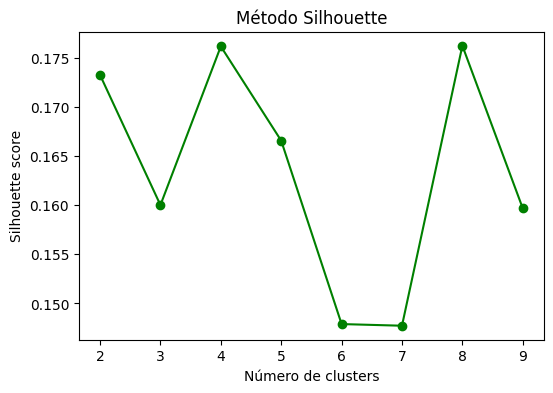

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Selección de variables para clustering
# -----------------------------
cluster_features = ['age','trestbps','chol','thalach','oldpeak','exang','cp','sex','restecg','fbs']
X = test[cluster_features].copy()

# -----------------------------
# 2️⃣ Imputación temporal de NA
# -----------------------------
num_cols = ['age','trestbps','chol','thalach','oldpeak']
cat_cols = ['exang','cp','sex','restecg','fbs']

# Numéricas → mediana
X[num_cols] = X[num_cols].fillna(X[num_cols].median())

# Categóricas/binarias → moda
for col in cat_cols:
    X[col] = X[col].fillna(X[col].mode()[0])

# -----------------------------
# 3️⃣ Normalización
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 4️⃣ Silhouette scores para 2–9 clusters
# -----------------------------
sil_scores = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

# -----------------------------
# 5️⃣ Visualización Silhouette
# -----------------------------
plt.figure(figsize=(6,4))
plt.plot(K_range, sil_scores, 'o-', color='green')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette score')
plt.title('Método Silhouette')
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


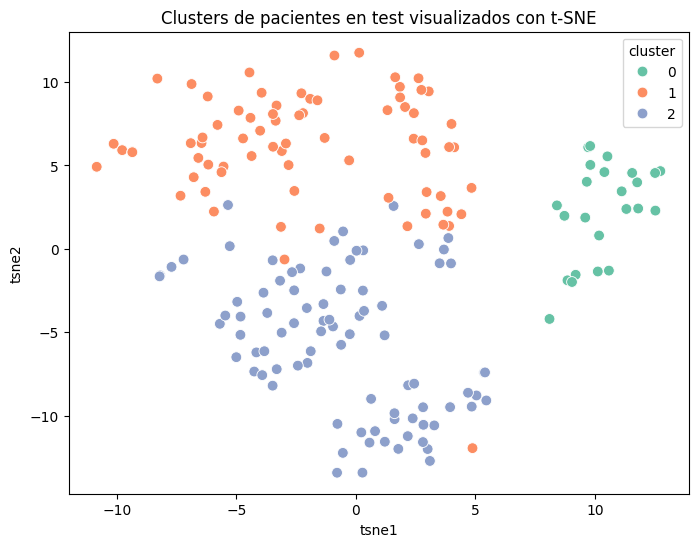

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Selección de variables para clustering
# -----------------------------
cluster_features = ['age','trestbps','chol','thalach','oldpeak','exang','cp','sex','restecg','fbs']
X_test = test[cluster_features].copy()

# -----------------------------
# 2️⃣ Imputación temporal de NA
# -----------------------------
num_cols = ['age','trestbps','chol','thalach','oldpeak']
X_test[num_cols] = X_test[num_cols].fillna(X_test[num_cols].median())

cat_cols = ['exang','cp','sex','restecg','fbs']
for col in cat_cols:
    X_test[col] = X_test[col].fillna(X_test[col].mode()[0])

# -----------------------------
# 3️⃣ Normalización
# -----------------------------
scaler = StandardScaler()
X_scaled_test = scaler.fit_transform(X_test)

# -----------------------------
# 4️⃣ Asignar clusters usando KMeans entrenado en train
# -----------------------------
test['cluster'] = kmeans.predict(X_scaled_test)  # kmeans del train

# -----------------------------
# 5️⃣ t-SNE para visualización
# -----------------------------
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne_test = tsne.fit_transform(X_scaled_test)

test['tsne1'] = X_tsne_test[:,0]
test['tsne2'] = X_tsne_test[:,1]

# -----------------------------
# 6️⃣ Visualización
# -----------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x='tsne1', y='tsne2', hue='cluster', data=test, palette='Set2', s=60)
plt.title("Clusters de pacientes en test visualizados con t-SNE")
plt.show()


In [ ]:
print(test.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'tsne1', 'tsne2', 'cluster'],
      dtype='object')


Resumen del risk_score:
count    184.000000
mean       2.667146
std        0.869691
min        1.260280
25%        1.969467
50%        2.592610
75%        3.286794
max        6.260013
Name: risk_score, dtype: float64


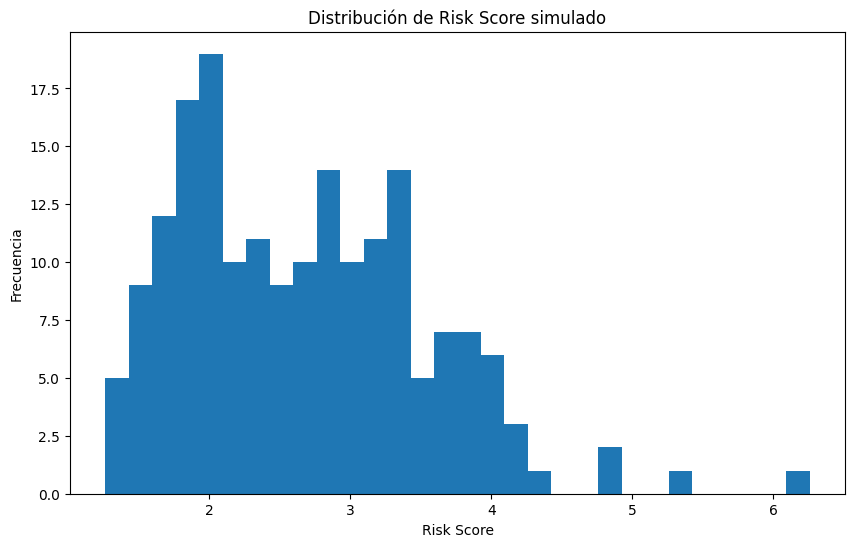

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def simulate_patient_risk(df):
    """
    Simula un 'risk_score' continuo tipo Gamma para cada paciente.
    """
    np.random.seed(42)
    df_risk = df.copy()

    base_risk = 1.0

    # ----------------- Factores multiplicativos -----------------
    age_factor = pd.cut(df_risk['age'],
                        bins=[0,49,59,120],
                        labels=[1.0,1.1,1.3])

    sex_factor = df_risk['sex'].map({0:1.0, 1:1.1})

    cp_factor = df_risk['cp'].map({1:1.0, 2:1.1, 3:1.2, 4:1.5})

    fbs_factor = df_risk['fbs'].map({0:1.0, 1:1.2})

    exang_factor = df_risk['exang'].map({0:1.0, 1:1.3})

    oldpeak_factor = np.where(df_risk['oldpeak']>1, 1.2, 1.0)

    cluster_factor = df_risk['cluster'].map({0:0.9, 1:1.1, 2:1.2})

    # ----------------- Riesgo multiplicativo -----------------
    risk = base_risk * age_factor.astype(float) * sex_factor * cp_factor * fbs_factor * exang_factor * oldpeak_factor * cluster_factor

    # ----------------- Componente aleatorio tipo Gamma -----------------
    random_component = np.random.gamma(shape=1.0, scale=risk*0.2)

    df_risk['risk_score'] = risk + random_component

    # ----------------- Estadísticas y visualización -----------------
    print("Resumen del risk_score:")
    print(df_risk['risk_score'].describe())

    plt.figure(figsize=(10,6))
    plt.hist(df_risk['risk_score'], bins=30)
    plt.title("Distribución de Risk Score simulado")
    plt.xlabel("Risk Score")
    plt.ylabel("Frecuencia")
    plt.show()

    return df_risk

# ----------------- Uso -----------------
test_risk = simulate_patient_risk(test)


Resumen del risk_score:
count    184.000000
mean       2.667146
std        0.869691
min        1.260280
25%        1.969467
50%        2.592610
75%        3.286794
max        6.260013
Name: risk_score, dtype: float64


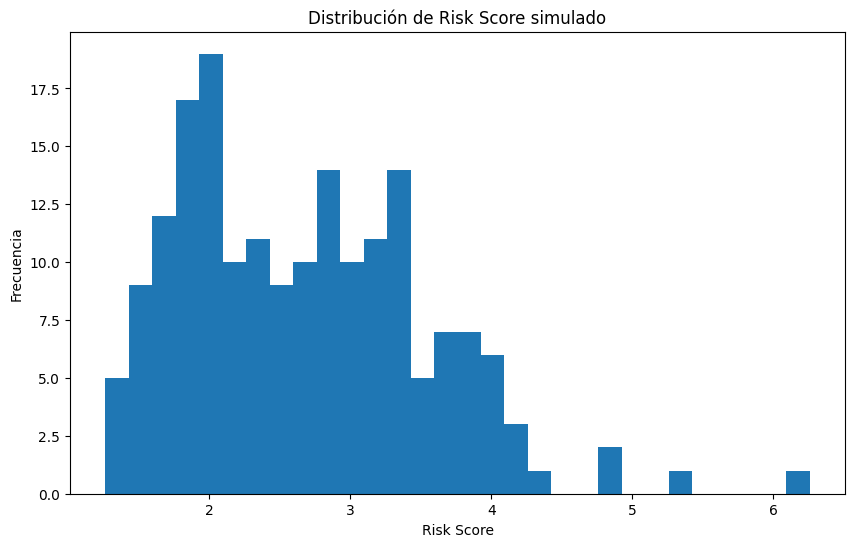

In [ ]:
# Simular el riesgo y devolver un DataFrame con la columna risk_score
test_with_risk = simulate_patient_risk(test)

# Guardar la columna directamente en el DataFrame original
test['risk_score'] = test_with_risk['risk_score']

In [ ]:
print(test.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'tsne1', 'tsne2', 'cluster',
       'risk_score'],
      dtype='object')


In [ ]:
test.to_csv('/content/drive/MyDrive/EDEM IA/IA_predictiva/IA_project/Data/Train/test_cluster.csv', index=False)

In [ ]:
# -----------------------------
# Revisión de NA en train
# -----------------------------
na_train = train.isna().sum()
na_train_pct = train.isna().mean() * 100

print("NA por columna en train:")
for col in train.columns:
    print(f"{col}: {na_train[col]} ({na_train_pct[col]:.2f}%)")

# -----------------------------
# Revisión de NA en test
# -----------------------------
na_test = test.isna().sum()
na_test_pct = test.isna().mean() * 100

print("\nNA por columna en test:")
for col in test.columns:
    print(f"{col}: {na_test[col]} ({na_test_pct[col]:.2f}%)")


NA por columna en train:
age: 0 (0.00%)
sex: 0 (0.00%)
cp: 0 (0.00%)
trestbps: 0 (0.00%)
chol: 0 (0.00%)
fbs: 0 (0.00%)
restecg: 0 (0.00%)
thalach: 0 (0.00%)
exang: 0 (0.00%)
oldpeak: 0 (0.00%)
slope: 0 (0.00%)
label: 0 (0.00%)
cluster: 0 (0.00%)
tsne1: 0 (0.00%)
tsne2: 0 (0.00%)
risk_score: 0 (0.00%)

NA por columna en test:
age: 0 (0.00%)
sex: 0 (0.00%)
cp: 0 (0.00%)
trestbps: 0 (0.00%)
chol: 0 (0.00%)
fbs: 0 (0.00%)
restecg: 0 (0.00%)
thalach: 0 (0.00%)
exang: 0 (0.00%)
oldpeak: 0 (0.00%)
slope: 0 (0.00%)
tsne1: 0 (0.00%)
tsne2: 0 (0.00%)
cluster: 0 (0.00%)
risk_score: 0 (0.00%)


In [ ]:
# -----------------------------
# 1️⃣ Borrar columnas ca y thal
# -----------------------------
test = test.drop(columns=['ca','thal'], errors='ignore')  # errors='ignore' evita errores si no existen

# -----------------------------
# 2️⃣ Imputar mediana en slope
# -----------------------------
if 'slope' in test.columns:
    test['slope'] = test['slope'].fillna(test['slope'].median())

# -----------------------------
# 3️⃣ Revisar que se haya aplicado
# -----------------------------
print("NA en slope:", test['slope'].isna().sum())


NA en slope: 0
